# Data Mining -  Final Project
Mohammad Saadati - 
_810198410_

## Introduction
In this project, we intend to turn the problem of estimating the damage caused to buildings by earthquakes based on their characteristics into a classification problem. Among the factors that can affect the amount of damage to a building in an earthquake can be the geographical area where the building is located, the number of floors of the building, the materials used in the building, the purpose of construction, the number of people And the families living in the building and the status of legal ownership of the land. In this project, we encounter problems that may arise during the classification process (such as the large number of features, the Label Imbalance problem, etc.) and take action to solve them.

## Import Libraries
First of all, we import necessary libraries to use their functions.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.express as px

## Phase 1: Preprocessing
Pre-processing is one of the most important steps in data mining projects. Various approaches are used in the field of lost data management and data conversion to other formats, and the careful selection of these approaches has a direct impact on the quality of the final results; Therefore, the best approach should always be identified and applied.

First we load csv file as a DataFrame using pandas library.

In [23]:
values_df = pd.read_csv("values.csv")
values_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [24]:
labels_df = pd.read_csv("labels.csv")
labels_df

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


First of all, we merge the two dataframe into one dataset.

In [25]:
dataset_df = pd.merge(values_df,labels_df)
dataset_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


The `describe()` function returns descriptive statistics for every column of DataFrame.

In [26]:
dataset_df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


The `info()` function returns a summary of DataFrame including data type and non-null values count of each column and also memory usage.

In [27]:
dataset_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Question 1:
There are different ways for handling categirical data.
* <b>Label Encoders:</b> Assigining numbers to each categorical value. 
* <b>One Hot Encoding:</b>  The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set. There are also other ways but here we choose to apply one Hot-Encode to categorical variables.
* <b>Ordinal Encoding:</b> We use this categorical data encoding technique when the categorical feature is ordinal. In this case, retaining the order is important. Hence encoding should reflect the sequence.

Label Encoders aren't a good option when we have no particular ordering in our categories. In these cases, we can use One Hot Encoding which takes a lot of memory since it is adding a new column for each new category. We use Ordinal Encoding because its give us better features.

In [28]:
from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None  # default='warn'
numerical_cols = list(dataset_df._get_numeric_data().columns)
categorical_cols = [x for x in list(dataset_df.columns) if x not in numerical_cols]

ord_enc = OrdinalEncoder()
dataset_df[categorical_cols] = ord_enc.fit_transform(dataset_df[categorical_cols].astype(str))
dataset_df

# for col in dataset_df:
#     if col == 'key' or col == 'mode':
#         brand_one_hot = pd.get_dummies(dataset_df[col], prefix=col)
#         dataset_df = dataset_df.drop([col], axis = 1)
#         dataset_df = pd.concat([dataset_df, brand_one_hot], axis = 1)
# dataset_df

# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# onehot = encoder.fit_transform(dataset_df[categorical_cols]).toarray()
# encoder_cols = encoder.get_feature_names(categorical_cols)
# categorical_df = pd.DataFrame(onehot,columns = encoder_cols)
# categorical_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1.0,2.0,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,0.0,2.0,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,2.0,2.0,...,0,0,0,0,0,0,0,0,0,2


### Question 2:
In this part, we plot the distribution of features.

Histograms are the simplest way to show how data is spread.

In [40]:
counter = 0
colors = ['#98f5ff', '#1cc32f', '#FF4040', '#9a34b5', '#1691a7', '#b5347e', '#e5d700', '#de6722', '#8B4513', '#C1FFC1'
          , '#ae8b0c', '#ff796c']
bad_column = ["building_id", "geo_level_1_id","geo_level_2_id","geo_level_3_id"]

# for column in dataset_df:
#     if column not in bad_column:
#         dataset_df[column].value_counts().plot.bar(color = colors[counter % 12])
#         plt.xlabel("Value") 
#         plt.ylabel("Count") 
#         plt.title("Distribution of " + column) 
#         plt.show()
#         counter += 1

If you want to combine histograms and KDE plot, Seaborn has another cool way to show both histograms and KDE plots in one graph: Distribution plot which draws KDE Plot with the flexibility of turning on and off the histograms by changing the hist parameter in the function.

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


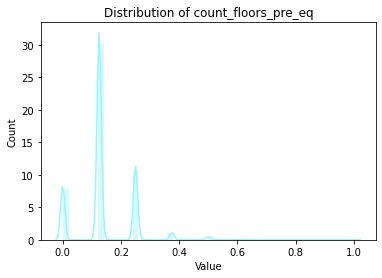

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


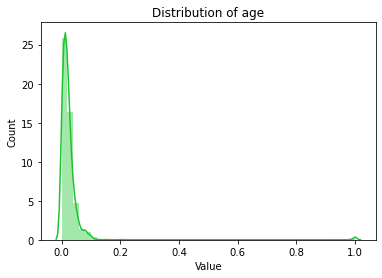

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


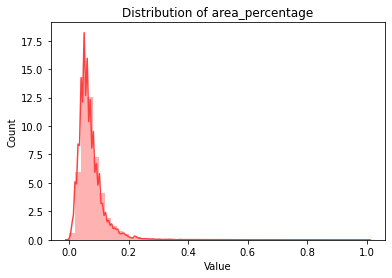

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


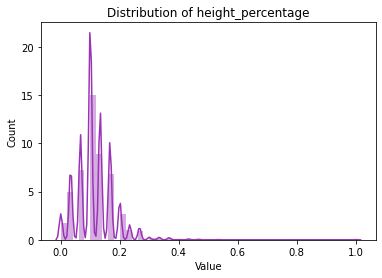

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


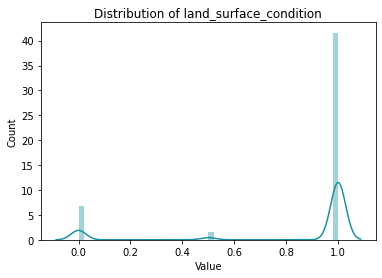

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


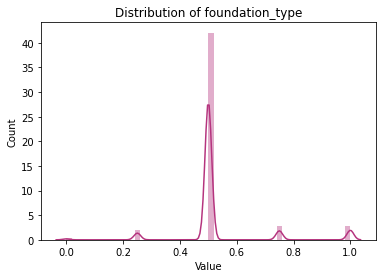

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


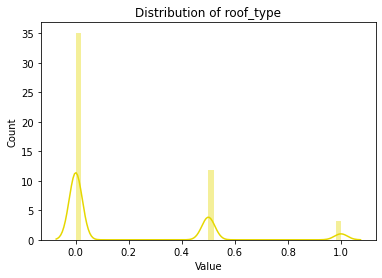

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


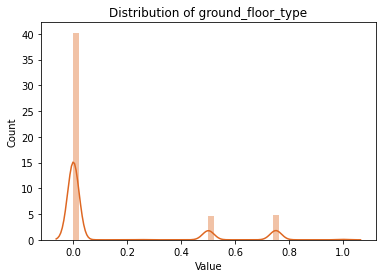

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


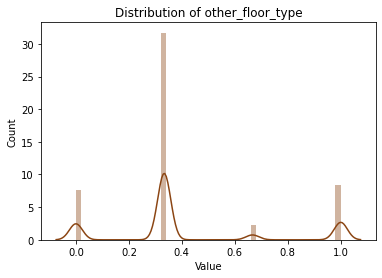

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


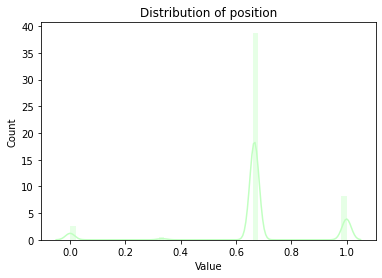

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


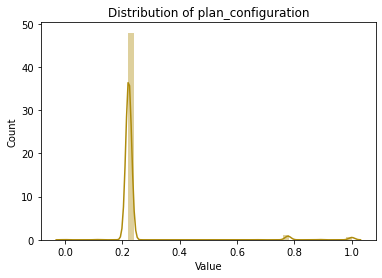

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


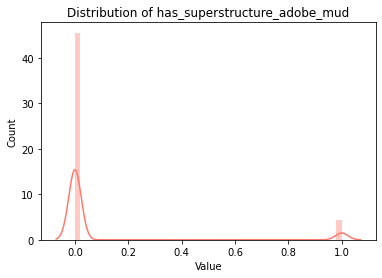

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


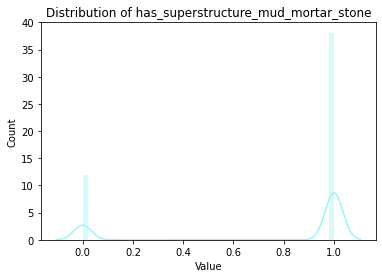

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


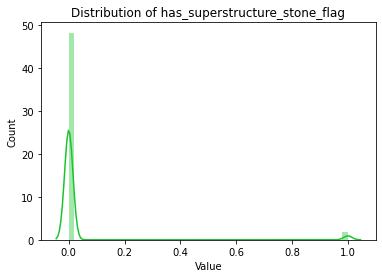

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


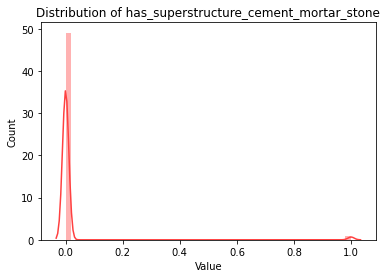

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


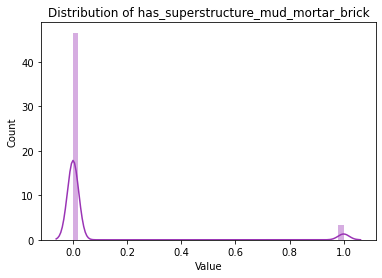

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


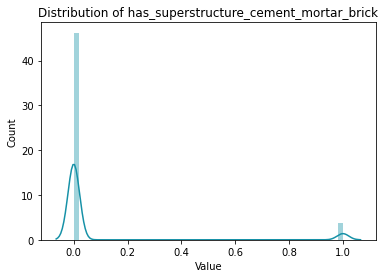

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


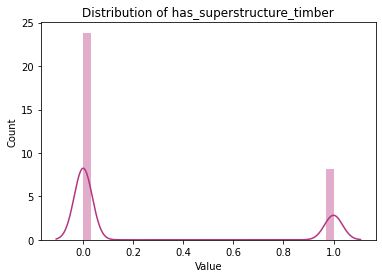

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


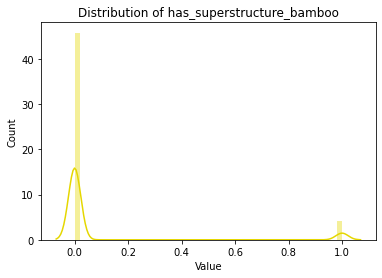

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


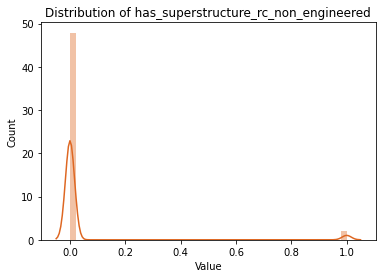

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


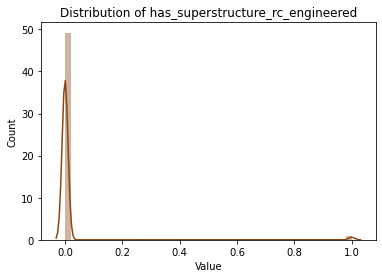

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


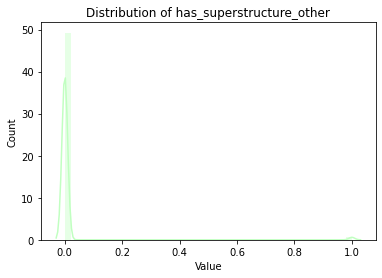

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


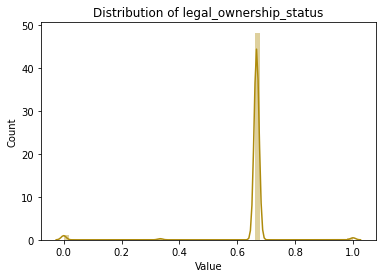

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


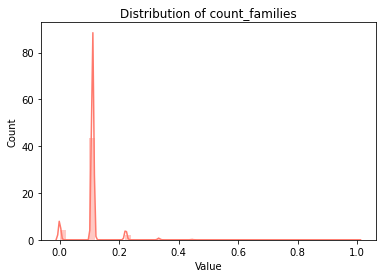

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


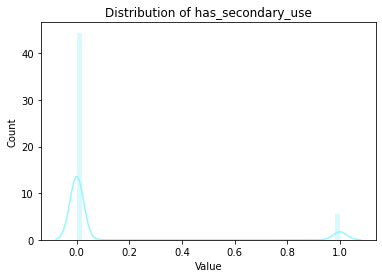

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


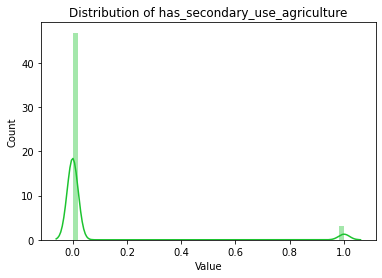

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


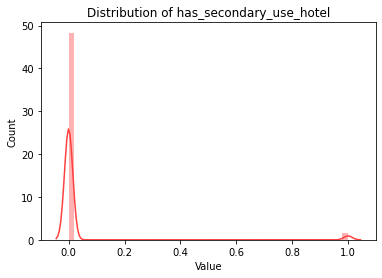

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


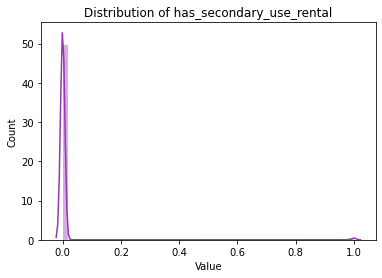

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


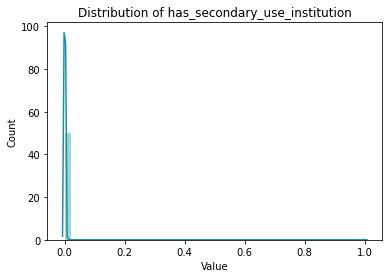

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


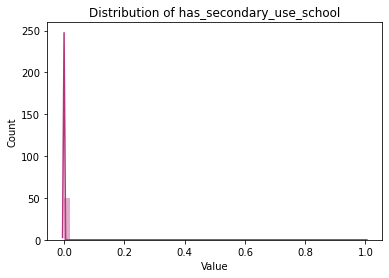

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


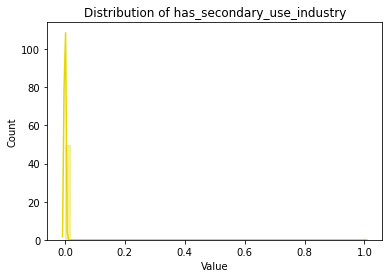

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


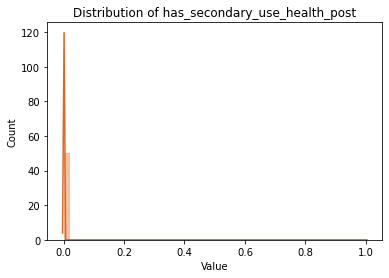

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


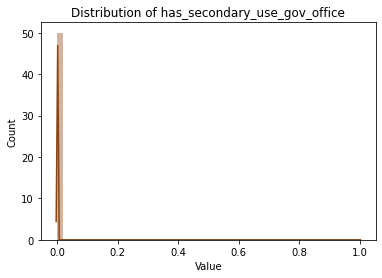

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


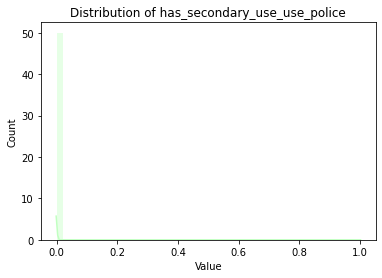

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


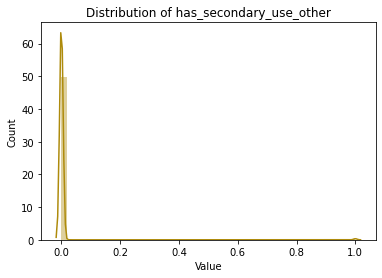

C:\Users\SAADATI-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


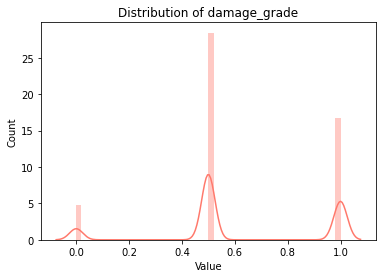

In [39]:
for column in dataset_df:
    if column not in bad_column:
        ax = sns.distplot(dataset_df[column], hist=True, color= colors[counter % 12])
        plt.xlabel("Value") 
        plt.ylabel("Count") 
        plt.title("Distribution of " + column) 
        plt.show() 
        counter += 1

Numerical features follow the normal distribution. Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

* <b>Normalizing Data:</b> Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.  Normalization change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. Normalization is required only when features have different ranges.
* <b>Standardizing Data:</b> Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). When we compare measurements that have different units Standardizing the features is important. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [29]:
norm_column = list(dataset_df._get_numeric_data().columns)

# for column in norm_column:
#     ax = dataset_df[column].plot.kde()

In [30]:
for col in norm_column:
    dataset_df[col] = (dataset_df[col]-dataset_df[col].min())/(dataset_df[col].max()-dataset_df[col].min()) # dataset_df[col].std()

dataset_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0.762541,0.200000,0.341275,0.970637,0.125,0.030151,0.050505,0.100000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.027377,0.266667,0.630694,0.223761,0.125,0.010050,0.070707,0.166667,0.5,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.090170,0.700000,0.254380,0.714013,0.125,0.010050,0.040404,0.100000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.561175,0.733333,0.292922,0.850959,0.125,0.010050,0.050505,0.100000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.191789,0.366667,0.091801,0.118405,0.250,0.030151,0.070707,0.233333,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.654015,0.833333,0.935529,0.128989,0.000,0.055276,0.050505,0.033333,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
260597,0.635827,0.566667,0.501051,0.163921,0.125,0.000000,0.050505,0.100000,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
260598,0.572220,0.566667,0.035739,0.649558,0.250,0.055276,0.050505,0.166667,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
260599,0.143794,0.866667,0.027330,0.147291,0.125,0.010050,0.131313,0.133333,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [31]:
# for column in norm_column:
#     ax = dataset_df[column].plot.kde()

### Question 3:
mutual_info_regression is used and the feature values and the target of dataset(type) passed to it.

In [35]:
from sklearn.feature_selection import mutual_info_regression

features = ['damage_grade'] 
y = dataset_df['damage_grade']
X = dataset_df.copy()
X = X.drop(columns=features, axis = 1)
mir = mutual_info_regression(X, y)
mir = pd.Series(mir)
mir.index = X.columns
mir

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(30,12), dpi= 80, facecolor='w', edgecolor='k')
mir.plot.bar()
plt.title('information gains with mutual_info_regression method')
plt.show()

if information gain (the values in the bar chart below) is high it means that the corresponding feature can provide more information than the others meaning that it'll help the training procedure more so it's a good idea to keep that feature in the dataset and use it's values in the training. This plot shows that the columns genres are giving us more useful info about the type of each row. We can simply eliminate the other columns since they don't have much gain.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

information_gains = dict(zip(dataset_df.drop(columns=features).columns, mutual_info_classif(dataset_df.drop(columns=features), dataset_df["damage_grade"])))
lists = sorted(information_gains.items())
x_, y_ = zip(*lists)
fig=plt.figure(figsize=(32,12), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_, y_)
plt.title('information gains with mutual_info_classif method')
plt.xticks(x_, information_gains.keys(), rotation='vertical')
plt.show()

Mutual information is a quantity that measures how much one random variables tells about another. Mutual information can be thought of as the reduction in uncertainty about one random variable given knowledge of another. High mutual information indicates a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables means the variables are independent. For calculating the information gain of features in this project the mutual_info_classif function from sklearn.feature_selection was used. The function returns an estimate for mutual information for a discrete target variable Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Feature selection is meant to choose the most effective features from data.
As we mentioned earlier we can use the the correlation between features and target to determine the most numerical features.
For the categorical features we can use the chi-square approach to check independent features from target and remove them.
Dimensionality reduction may create new features from current features to get more accuraccy.

An alternative approach could be to remove categorical variables from the dataset. While removing features is always an option, it may not be the best way to deal with categorical variables as we will lose potentially important information.

In [ ]:
dataset_df.corr()

In [ ]:
corr = dataset_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={"fontsize":6})
plt.title("Multi-Collinearity of Music Attributes")
plt.show()